# Fourier Transforms
Fourier transforms are a mathematical operation which when acted on a function, decomoses it to its constituent frequencies. In the Fourier Series course, we have shown that a periodic function can be expressed as an infinite sum of sine and cosine functions. We have also shown that, through scaling laws, we can extend the period of the function to an arbitrary length. If the highest frequency in the Fourier Series is kept the same and we keep extending the period of the function, the sum will become longer and longer. In the limit where the period is expanded to infinity, the sum will become an integral, resulting to the definition of the *Fourier Transform*.

The *Fourier Transform* of a function $f(t)$ to a new function $F(\omega)$ is defined as

$$F(\omega) = \int_{-\infty}^{\infty}f(t)e^{-i{\omega}t}dt$$

Using this definition, $f(t)$ is given by the Inverse Fourier Transform

$$f(t) = \frac{1}{2{\pi}} \int_{-\infty}^{\infty}F(\omega)e^{i{\omega}t}d{\omega}$$

Using these 2 expressions we can write

$$f(t) = \frac{1}{2{\pi}} \int_{-\infty}^{\infty} \left[ \int_{-\infty}^{\infty}f(t)e^{-i{\omega}t}dt \right]e^{i{\omega}t}d{\omega}$$

This is known as *Fourier's Integral Theorem*. This proves that *any* function can be represented as an infinite sum (integral) of sine and cosine functions, linking back to the Fourier Series.

Note that this definition of the Fourier Transform is not unique. There are many different conventions for the Fourier Transform, but we will stick with this one for this course.

**A note on Notation:**

I will represent the Fourier Transform operator using the calligraphic symbol $\mathcal{F}[f(t)]$, such that

$$ \mathcal{F}[f(t)] = F(\omega)$$

Using this notation, I will represent the *Inverse* Fourier transform operator as $\mathcal{F}^{-1}[F(\omega)]$ such that

$$ \mathcal{F}^{-1}[F(\omega)] = f(t) $$

Lets look at an example, the top hat function defined as 

$$
{\Pi}_a(t) = \left\{
    \begin{array}\\
        1/a &  \ -a/2 < t < a/2 \\
        0 & \mbox{otherwise}\\
    \end{array}
\right.
$$

With a Fourier Transform of

$$F(\omega) = sinc({\omega}/2)$$


Lets plot the function and its Fourier Transform

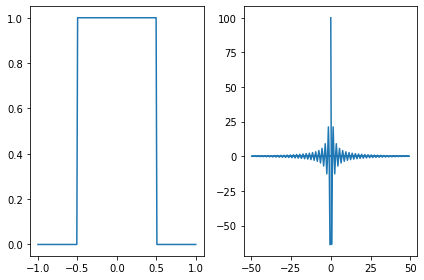

In [235]:
import numpy as np
import matplotlib.pyplot as plt

#define the top hat function for a = 1
def top_hat(t):
    if -0.5 < t < 0.5:
        z = 1
    else:
        z=0
    return z

t = np.linspace(-1, 1, 200)
f_t = []
for i in t:
    y = top_hat(i)
    f_t.append(y)

omega = np.fft.fftfreq(len(t),d=t[1] - t[0])
F_omega = np.fft.fft(f_t)

plt.subplot(1,2,1)
plt.plot(t, f_t)

plt.subplot(1,2,2)
plt.plot(omega, np.real(F_omega), '-')
#plt.xlim([-10, 10])
plt.tight_layout()
plt.show()

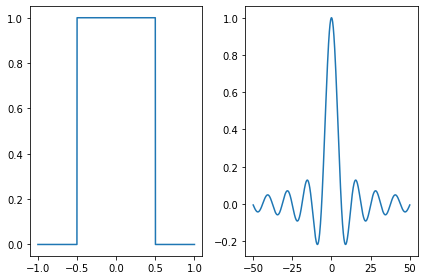

In [61]:
import numpy as np
import matplotlib.pyplot as plt

#define the top hat function for a = 1
def top_hat(t):
    if -0.5 < t < 0.5:
        z = 1
    else:
        z=0
    return z

t = np.linspace(-1, 1, 1000)
omega = np.linspace(-50, 50, 1000)

f_t = []
for i in t:
    y = top_hat(i)
    f_t.append(y)
F_omega = []
for i in omega:
    z = np.sinc(i/(2 * np.pi))
    F_omega.append(z)

plt.subplot(1,2,1)
plt.plot(t, f_t)

plt.subplot(1,2,2)
plt.plot(omega, F_omega)

plt.tight_layout()
plt.show()

## Special functions and their Fourier Transforms
This section will focus on useful functions and their Fourier Transforms. We will look at the Delta and Gaussian functions. 

**1. Delta Function**

The delta function, $\delta(t)$, is defined as

$$
{\delta}(t) = \left\{
    \begin{array}\\
        0 &  \  t \neq 0 \\
        \infty & t = 0\\
    \end{array}
\right.
$$

Carrying out the transform we see that Fourier Transform of the delta function is actually a constant, such that

$$ \mathcal{F}[{\delta}(t)] = 1 $$

Lets plot the function and its transform.

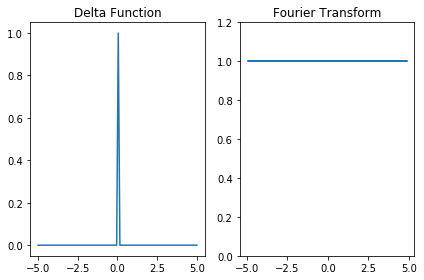

In [404]:
from scipy import signal
imp = signal.unit_impulse(100, 'mid') #creates the delta function
t = np.linspace(-5, 5, 100)

plt.subplot(1,2,1)
plt.plot(t, imp)
plt.title('Delta Function')


FT_omega = np.fft.fftfreq(100, t[1] - t[0])
FT = np.fft.fft(imp)

plt.subplot(1,2,2)
plt.plot(FT_omega, abs(FT))
plt.title('Fourier Transform')
plt.ylim([0,1.2])
plt.tight_layout()
plt.show()

**2. Gaussian**

A Gaussian function is defined as 

$$ f(t) = exp\left(- \frac{t^2}{2{\sigma^2}}\right) $$

where $\sigma$ is the standard devation of the Gaussian. The Fourier transform of a gaussian is another Gaussian such that

$$ \mathcal{F}[f(t)] = \sqrt{2\pi}\, exp\left(- \frac{\omega^2\sigma^2}{2}\right) $$

Thus, we can see that as the Gaussian function gets broader, its Fourier Transform gets narrower. To illustrate this, lets plot the Gaussian and its transform for two different standard deviations.

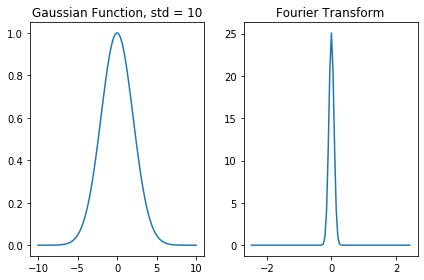

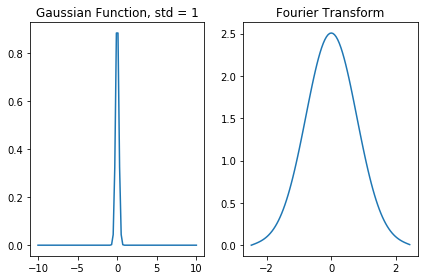

In [406]:
g1 = signal.gaussian(100, std = 10)
t = np.linspace(-10, 10, len(g1))

plt.subplot(1,2,1)
plt.plot(t, g1)
plt.title('Gaussian Function, std = 10')


FT_omega = np.fft.fftfreq(len(g1), t[1] - t[0])
FT = np.fft.fft(g1)
FT_omega = np.fft.fftshift(FT_omega)
FT = np.fft.fftshift(FT)

plt.subplot(1,2,2)
plt.plot(FT_omega, abs((FT)))
plt.title('Fourier Transform')
plt.tight_layout()
plt.show()

g2 = signal.gaussian(100, std = 1)
t = np.linspace(-10,10, len(g2))

plt.subplot(1,2,1)
plt.plot(t, g2)
plt.title('Gaussian Function, std = 1')

FT_omega = np.fft.fftfreq(len(g2), t[1] - t[0])
FT = np.fft.fft(g2)
FT_omega = np.fft.fftshift(FT_omega)
FT = np.fft.fftshift(FT)

plt.subplot(1,2,2)
plt.plot(FT_omega, abs((FT)))
plt.title('Fourier Transform')
plt.tight_layout()
plt.show()

## Properties of Fourier Transforms
When determining the Fourier Transform of a function, there are a number of properties that can make our calculations easier or even allow us to identify the transform of the function in question into an already known transform. Thus, being familiar with the properties of the Fourier Transforms can be of great use when considering the transforms of specific functions.

**1. Even and Odd functions**

In general,the Fourier Transform, $F(\omega)$, of a function $f(t)$ will be complex and thus can be written as

$$F(\omega) = R(\omega) + iI(\omega)$$

We can show that the real part of the transform, $R(\omega)$, is related to the even part of the function and that the imaginary part of the transform, $iI(\omega)$, is related to the odd part of the function.

Lets start with an even funtion, $f(t)$, and determine its Fourier Transform.

$$F(\omega) = \int_{-\infty}^{\infty}f(t)e^{-i{\omega}t}dt$$

$$F(\omega) = \int_{-\infty}^{0}f(t)e^{-i{\omega}t}dt + \int_{0}^{\infty}f(t)e^{-i{\omega}t}dt$$

$$F(\omega) = - \int_{0}^{-\infty}f(t)e^{-i{\omega}t}dt + \int_{0}^{\infty}f(t)e^{-i{\omega}t}dt$$

$$F(\omega) = - \int_{0}^{\infty}f(-t)e^{-i{\omega}t}d(-t) + \int_{0}^{\infty}f(t)e^{-i{\omega}t}dt$$

Since $f(t)$ is even, we can use $f(t) = f(-t)$ resulting to

$$F(\omega) = \int_{0}^{\infty}f(t)e^{i{\omega}t}dt + \int_{0}^{\infty}f(t)e^{-i{\omega}t}dt$$

$$F(\omega) = \int_{0}^{\infty}f(t)\left[ e^{i{\omega}t} + e^{-i{\omega}t} \right]dt$$

$$F(\omega) = 2\int_{0}^{\infty}f(t) \cos({\omega}t)dt$$

But since $f(t)$ and $\cos({\omega}t)$ are both even functions, we can write

$$F(\omega) = \int_{- \infty}^{\infty}f(t) \cos({\omega}t)dt$$

Using a similar procedure, we can derive that for an odd function $f(t)$ the Fourier Transform becomes

$$F(\omega) = -i \int_{- \infty}^{\infty}f(t) \sin({\omega}t)dt$$

Thus, this proves that the Fourier transform of an even, $e(t)$, function is real, while the Fourier Transform of an odd function, $o(t)$, is imaginary. We can take this further, by considering each function, $f(t)$, as a sum of an even and an odd function, such that $f(t) = e(t) + o(t)$. As we stated earlier the Fourier transform of a function can be written as $F(\omega) = R(\omega) + iI(\omega)$. Using these results we can show that

$$R(\omega) = \mathcal{F}[e(t)] = \int_{- \infty}^{\infty}f(t) \cos({\omega}t)dt$$

$$iI(\omega) = \mathcal{F}[o(t)] = -i \int_{- \infty}^{\infty}f(t) \sin({\omega}t)dt$$

**2. Linearity and Superposition**

A Fourier Transform is linear, meaning that for a function $f(t) = af_1(t) + bf_2(t)$ the Fourier Transform becomes

$$ \mathcal{F}\left[f(t)\right] = \mathcal{F}\left[af_1(t) + bf_2(t)\right] = a\mathcal{F}\left[f_1(t)\right]) + b\mathcal{F}\left[f_2(t)\right] $$

This can be easily proven by considering the definition of the Fourier Transform. Again, consider the Fourier Transform of $f(t) = af_1(t) + bf_2(t)$

$$\mathcal{F}[af_1(t) + bf_2(t)] = \int_{-\infty}^{\infty}[af_1(t) + bf_2(t)]e^{-i{\omega}t}dt$$

$$\mathcal{F}[af_1(t) + bf_2(t)] = a\int_{-\infty}^{\infty}[f_1(t)]e^{-i{\omega}t}dt + b\int_{-\infty}^{\infty}[f_2(t)]e^{-i{\omega}t}dt$$

$$\mathcal{F}[af_1(t) + bf_2(t)] = aF_1(\omega) + bF_2(\omega)$$

**3. Reciprocal Broadening / Scaling**

Streaching a function by a factor $\alpha$, results in the Fourier Transform of the function to be compressed by the same factor. Consider the transform of a function, $f({\alpha}t)$

$$\mathcal{F}[f({\alpha}t)] = \int_{-\infty}^{\infty}f({\alpha}t)e^{-i{\omega}t}dt$$

$$\mathcal{F}[f({\alpha}t)] = \frac{1}{|\alpha|}\int_{-\infty}^{\infty}f({\alpha}t)e^\frac{{-i{\omega}{\alpha}t}}{\alpha}d({\alpha}t)$$

$$\mathcal{F}[f({\alpha}t)] = \frac{1}{|\alpha|} F\left(\frac{\omega}{\alpha}\right)$$

This shows that as the functions gets broader, its transform not only becomes narrower but due to the $1\,/\,|\alpha|$ factor it also increases in amplitude.

**4. Translation**

Shifting a function by a certain amount results to a phase shift on the Fourier Transform.

$$\mathcal{F}[f(t - t_0)] = e^{-i{\omega}t_0}F(\omega)$$

$$\mathcal{F}[f(t - t_0)e^{-it{\omega}_0}] = F({\omega} - {\omega}_0)$$

**5. Derivatives and Integrals**

Finding the transform of derivative simply translates to a multiplication of the original transform such that

$$\mathcal{F}[f'(t)] = i{\omega}F(\omega)$$

To prove this we must differentiate the function, $f(t)$, and take its transform

$$f(t) = \frac{1}{2{\pi}} \int_{-\infty}^{\infty}F(\omega)e^{i{\omega}t}d{\omega}$$

$$\mbox{differentiating, we get}  \,\,\,\,\, f'(t) = \int_{-\infty}^{\infty}i{\omega}F(\omega)e^{i{\omega}t}d{\omega}$$

This can be indentified as the inverse Fourier Transform, such that

$$ f'(t) = \mathcal{F}^{-1}[i{\omega}F(\omega)]$$

Thus, taking the Fourier Transform of $f'(t)$ proves the above statement

$$ \mathcal{F}[f'(t)] = \mathcal{F}[\mathcal{F}^{-1}[i{\omega}F(\omega)]]$$

$$\mathcal{F}[f'(t)] = i{\omega}F(\omega)$$

We can generalise this result to higher order derivatives. For the $nth$ derivative 

$$ \mathcal{F}[f'^{(n)}(t)] = (i{\omega})^{n}F(\omega)$$

This shows that differentiation magnifies *high frequencies* and shifts the phase of the transform by ${\pi}\,/\,{2}$

Using this result we can show how integration affects the transform of a function

$$\int \mathcal{F}[f(t)]dt = F(\omega) \, / \, i{\omega} \,\, + constant$$

## Convolution

When discussing the nature of Fourier Series and Transforms, one needs to discuss *convolutions*. Simply stated, a convolution of two (or more) functions is defined as the integral over *all space* of the product of the *two* desired functions after one has been *reversed and shifted* .

The convolution of two functions, $a(t)$ and $b(t)$ is denoted by $a(t) * b(t)$ and defined as

$$a(t) * b(t) =  \int_{-\infty}^{\infty} a(u) b(t-u)du$$

where u is a dummy variable that dissapears on integration. It should be noted that convolution is commutative, meaning that the ordering is not important.

Convolution is perharps one of the most important tools for a scientist of any discipline. This can be illustrated via a simple example.  Imagine you have just made  measurements of the magnitude of a magnetic field at a particular direction using a magnetometer. Those measurements have an inherent error due to the precision of the instrument you used. This error will lead to the *smearing* of your outcome distribution, or in other words the true distribution has been *convolved* with the error function. Therefore in order to recover the original (true) distrubution of your measurements you need to use the *Convolution Theorem*, detailed below.

## The Convolution Theorem

Let us examine what happens when we apply a Fourier Transform on a convolution of two functions.

$$ \mathcal{F}[f_1(t) * f_2(t)] =  \int_{-\infty}^{\infty} \left(\int_{-\infty}^{\infty} f_1(u) f_2(t-u)du\right) e^{-i{\omega}t}dt$$

$$ \mathcal{F}[f_1(t) * f_2(t)] =  \int_{-\infty}^{\infty} f_1(u)e^{-i{\omega}u}\left(\int_{-\infty}^{\infty}  f_2(t-u)e^{-i{\omega}(t-u)}dt\right)du$$

$$ \mathcal{F}[f_1(t) * f_2(t)] =  \left(\int_{-\infty}^{\infty} f_1(u)e^{-i{\omega}u}du\right) \left(\int_{-\infty}^{\infty}  f_2(s)e^{-i{\omega}(s)}ds\right)$$

$$ \mathcal{F}[f_1(t) * f_2(t)] = F_1(\omega) F_2(\omega) $$

where the splitting of the inegrals comes from making the substitution $s = t - u$ and then noting that $u$ no longer appears on the inner integral. The final expression deduced above is known as *The Convolution Theorem*. It is one of the most important properties of Fourier Transfors which is evident as it is essentially the essence of Fourier Analysis. The Convolution Theorem states that the Fourier Transform of the convolution of two functions is equal to the product of the Fourier Transforms of each function. Looking at it in the opposite direction, the Fourier Transform of the product of two functions is given by the convolution of the Fourier Transform of those functions individually.

$$ \mathcal{F}[f_1(t) f_2(t)] = \frac{1}{2\pi}F_1(\omega) * F_2(\omega) $$

Going back to the problem we discussed at the beginning of the notebook, we can now utilise the Convolution Theorem to understand how to retrieve the true distribution from a set of data that has been convolved with an error function. Simply, apply a Fourier transform on the resulting convolved distribution and divide it by the Fourier Transform of the known error function. The result will be the Fourier Transform of your true distribution.  
